# <span style="color:#FA8072"> Case Study 2 </span>

# <span style="color:#FA8072"> 1. Summary </span> <a class="anchor" id="summary_1"></a>

Bellabeat is a high-tech company that manufactures health-focused smart products.They offer different smart devices that collect data on activity, sleep, stress, and reproductive health to empower women with knowledge about their own health and habits. 

The main focus of this case is to analyze smart devices fitness data and determine how it could help unlock new growth opportunities for Bellabeat. We will focus on one of Bellabeat’s products: Bellabeat app.

The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products

# <span style="color:#FA8072">  2. Ask Phase </span>  <a class="anchor" id="ask_phase_2"></a>

### 2.1 Business Task <a class="anchor" id="business_task_2_1"></a> 

Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy. 

Stakeholders 

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer 
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team 
* Bellabeat Marketing Analytics team 

## <span style="color:#FA8072"> 3. Prepare Phase </span> <a class="anchor" id="prepare_phase_3"></a> 

#### 3.1 Dataset used: <a class="anchor" id="dataset_used_3_1"></a> 

The data source used for our case study is FitBit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius. 

#### 3.2 Accessibility and privacy of data: <a class="anchor" id="accessibility_and_privacy_of_data_3_2"></a> 

Verifying the metadata of our dataset we can confirm it is open-source. The owner has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law.
You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

#### 3.3 Information about our dataset:<a class="anchor" id="information_about_our_dataset_3_3"></a>  

These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.  Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.  







#### 3.5 Data Credibility and Integrity:<a class="anchor" id="data_credibility_and_integrity_3_5"></a> 

Due to the limitation of size (30 users) and not having any demographic information we could encounter a sampling bias. We are not sure if the sample is representative of the population as a whole. 
Another problem we would encounter is that the dataset is not current and also the time limitation of the survey (2 months long). That is why we will give our case study an operational approach. 

# <span style="color:#FA8072">  4. Process Phase </span> <a class="anchor" id="process_phase_4"></a> 
 
I will focus my analysis in R due to the accessibility, amount of data and to be able to create data visualization to share my results with stakeholders. 

### 4.1 Installing packages and opening libraries <a class="anchor" id="installing_packages_and_opening_libraries_4_1"></a> 

We will choose the packages that will help us on our analysis and open them. 
We will use the following packages for our analysis: 

* numpy
* pandas 
* matplotlib
* seaborn
* scikit learn, etc.


# Data collection phase 

In [1]:
!pip install numpy
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install scipy scikit-learn

In [2]:
# importing  data analysis libraries 
import numpy as np           # For numerical operations
import pandas as pd          # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns        # For advanced data visualization
import scipy.stats as stats  # For statistical functions
import sklearn               # For machine learning and data preprocessing
import statsmodels.api as sm # For statistical modeling
import plotly.express as px  # For interactive data visualization
import datetime              # For working with dates and times


# Data cleaning and merging 

In [3]:
# importing datasets needed for our analysis 
daily_activity = r"C:\Users\ACER\Desktop\bellabeat datasets\Fitabase Data 4.12.16-5.12.16\bellabeat datatsets\dailyActivity_merged.csv"
daily_sleep = r"C:\Users\ACER\Desktop\bellabeat datasets\Fitabase Data 4.12.16-5.12.16\bellabeat datatsets\sleepDay_merged.csv"
hourly_steps = r"C:\Users\ACER\Desktop\bellabeat datasets\Fitabase Data 4.12.16-5.12.16\bellabeat datatsets\dailySteps_merged.csv"

In [4]:
df1 = pd.read_csv(daily_activity)
df2 = pd.read_csv(daily_sleep)
df3 = pd.read_csv(hourly_steps)

In [5]:
df1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
df2.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [7]:
df3.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


# making column consistent 

from the tables above, the tables seem to have different name for date time column, while the activity data just have only date. since we would need to combine this tables for our analysis there is a need to make it consistent in terms of data type and column names 

i will make the date column consistent for the three tables by changing activityday, sleepday, and activitydate to Date

In [8]:
# extracting day of the month and hours of the day from sleepday column in df2
df2['SleepDay'] = pd.to_datetime(df2['SleepDay'])  # Convert to datetime type
df2['day_of_month'] = df2['SleepDay'].dt.day
df2['hour_of_day'] = df2['SleepDay'].dt.hour


In [9]:
df2['SleepDay'] = pd.to_datetime(df2['SleepDay'])
df2.rename(columns={'SleepDay': 'Date'}, inplace=True)


In [10]:
# changing date column to Date for the 3 dataframe 
df1.rename(columns={'ActivityDate':'Date'}, inplace=True)
df3.rename(columns={'ActivityDay': 'Date'}, inplace=True)


In [11]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Index(['Id', 'Date', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'day_of_month', 'hour_of_day'],
      dtype='object')
Index(['Id', 'Date', 'StepTotal'], dtype='object')


In [12]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   Date                      940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [13]:
print(df1.describe())
print(df2.describe())
print(df3.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

In [14]:
df1.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [15]:
df2.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_month,hour_of_day
0,1503960366,2016-04-12,1,327,346,12,0
1,1503960366,2016-04-13,2,384,407,13,0
2,1503960366,2016-04-15,1,412,442,15,0
3,1503960366,2016-04-16,2,340,367,16,0
4,1503960366,2016-04-17,1,700,712,17,0


In [16]:
df3.head()

,Id,Date,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [17]:
print(df1.dtypes)

print(df2.dtypes)

print(df3.dtypes)

Id                            int64
Date                         object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
Id                             int64
Date                  datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
day_of_month                   int64
hour_of_day                    int64
dtype: object
Id            int64
Date         object
StepTotal     int64
dtype: object


# merging the three datasets 
now i will merge the datasets, but i will make the date column in table df1 and df2 to be of datetime types. then i will merge the datasets on Id and Date columns.

In [18]:
# Convert the object column to datetime in both DataFrames
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Merge the DataFrames on the 'Id' and 'Date' columns
merge_df = pd.merge(df1, df2, on=['Id', 'Date'])

# df3 is the third DataFrame
# we first Convert its 'Date' column to datetime as well
df3['Date'] = pd.to_datetime(df3['Date'])

# Merge df3 with the previously merged DataFrame
df = pd.merge(merge_df, df3, on=['Id', 'Date'])

# Print the resulting merged DataFrame
print(df.head())



           Id       Date  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366 2016-04-12       13162           8.50             8.50   
1  1503960366 2016-04-13       10735           6.97             6.97   
2  1503960366 2016-04-15        9762           6.28             6.28   
3  1503960366 2016-04-16       12669           8.16             8.16   
4  1503960366 2016-04-17        9705           6.48             6.48   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.14                      1.26   
3                       0.0                2.71                      0.41   
4                       0.0                3.19                      0.78   

   LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0                 6.06     

In [19]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_month,hour_of_day,StepTotal
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.0,413.000000
mean,5.000979e+09,8541.140436,6.038620,6.033632,0.113142,1.450363,0.750242,3.807119,0.000920,25.188862,18.038741,216.854722,712.169492,2397.573850,1.118644,419.467312,458.639225,15.777240,0.0,8541.140436
std,2.060360e+09,4156.926990,3.051998,3.047420,0.513107,1.994352,1.000183,1.734511,0.008653,36.388187,22.403590,87.164687,165.957432,762.886326,0.345521,118.344679,127.101607,8.704634,0.0,4156.926990
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000,1.000000,0.0,17.000000
25%,3.977334e+09,5206.000000,3.600000,3.600000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.000000,1850.000000,1.000000,361.000000,403.000000,8.000000,0.0,5206.000000
50%,4.702922e+09,8925.000000,6.290000,6.290000,0.000000,0.570000,0.420000,3.680000,0.000000,9.000000,11.000000,208.000000,717.000000,2220.000000,1.000000,433.000000,463.000000,16.000000,0.0,8925.000000
75%,6.962181e+09,11393.000000,8.030000,8.020000,0.000000,2.370000,1.040000,4.930000,0.000000,38.000000,27.000000,263.000000,783.000000,2926.000000,1.000000,490.000000,526.000000,23.000000,0.0,11393.000000
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000,30.000000,0.0,22770.000000


# DATA CLEANING PHASE 
we would clean and prepare our data for analysis by carrying out the following 
* remove duplicates 
* remove missing values 
* check for correlations 
* check for outliers 


check for duplicates values and remove it 

In [20]:
# check for duplicates 
df.nunique()

Id                           24
Date                         31
TotalSteps                  409
TotalDistance               343
TrackerDistance             341
LoggedActivitiesDistance      6
VeryActiveDistance          201
ModeratelyActiveDistance    160
LightActiveDistance         299
SedentaryActiveDistance       7
VeryActiveMinutes           102
FairlyActiveMinutes          73
LightlyActiveMinutes        226
SedentaryMinutes            277
Calories                    370
TotalSleepRecords             3
TotalMinutesAsleep          256
TotalTimeInBed              242
day_of_month                 30
hour_of_day                   1
StepTotal                   409
dtype: int64

# Handling missing values
first we check for missing values and count it 
then we handle it 

In [21]:
# check for missing values 
is_nan = df.isnull()
# count missing values 
count_nan = is_nan.sum()

# Display columns with NaN counts
print("Columns with NaN counts:")
print(count_nan[count_nan > 0])

Columns with NaN counts:
Series([], dtype: int64)


There are no missing values in the datasets 

In [22]:
df.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_month,hour_of_day,StepTotal
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,1,327,346,12,0,13162
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,2,384,407,13,0,10735
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,1,412,442,15,0,9762
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,2,340,367,16,0,12669
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,1,700,712,17,0,9705


In [23]:
# extracting day of the week from date column 
df['Dayofweek'] = df['Date'].dt.day_name()

df.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_month,hour_of_day,StepTotal,Dayofweek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,1,327,346,12,0,13162,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,217,776,1797,2,384,407,13,0,10735,Wednesday
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,209,726,1745,1,412,442,15,0,9762,Friday
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,221,773,1863,2,340,367,16,0,12669,Saturday
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,164,539,1728,1,700,712,17,0,9705,Sunday


# checking for outliers 
we creates box plots for each of the specified numerical columns in the dataset. Outliers can be identified as points beyond the whiskers of the box plots.

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\L

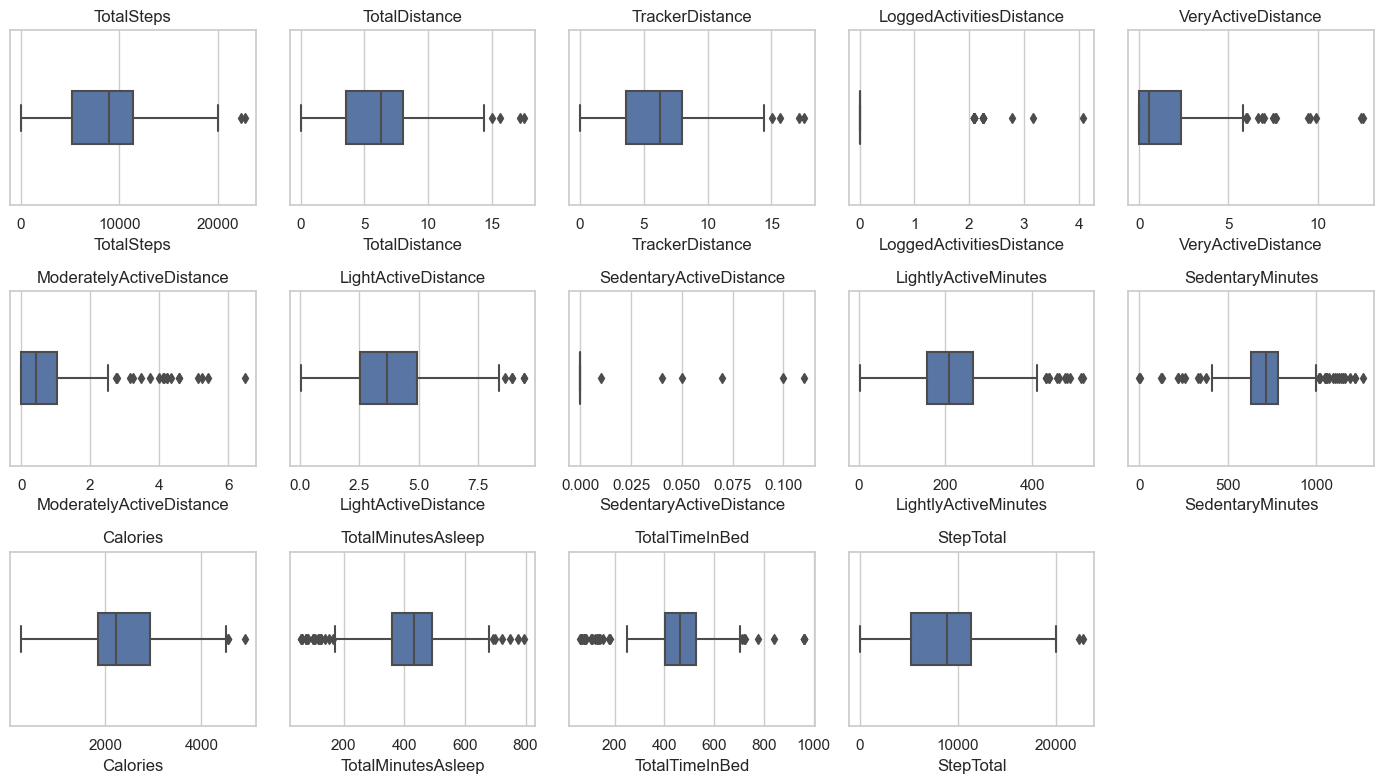

In [24]:
# Assuming your data is in a DataFrame called 'df'
columns_to_check = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
                    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
                    'SedentaryActiveDistance', 'LightlyActiveMinutes', 'SedentaryMinutes',
                    'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed', 'StepTotal']

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column], orient="vertical", width=0.3)
    plt.title(column)
    plt.tight_layout()

plt.show()


To remove outliers from your dataset based on the box plots, you can use the interquartile range (IQR) method.

In [25]:
# Assuming your data is in a DataFrame called 'df'
columns_to_check = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
                    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
                    'SedentaryActiveDistance', 'LightlyActiveMinutes', 'SedentaryMinutes',
                    'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed', 'StepTotal']

# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each specified column
for column in columns_to_check:
    df = remove_outliers_iqr(df, column)

# Reset index
df.reset_index(drop=True, inplace=True)

# Now, 'df' contains the data with outliers removed for the specified columns


Now that the outliers have been removed, we make box plots again for each columns to check if their are still

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\ACER\anaconda3\L

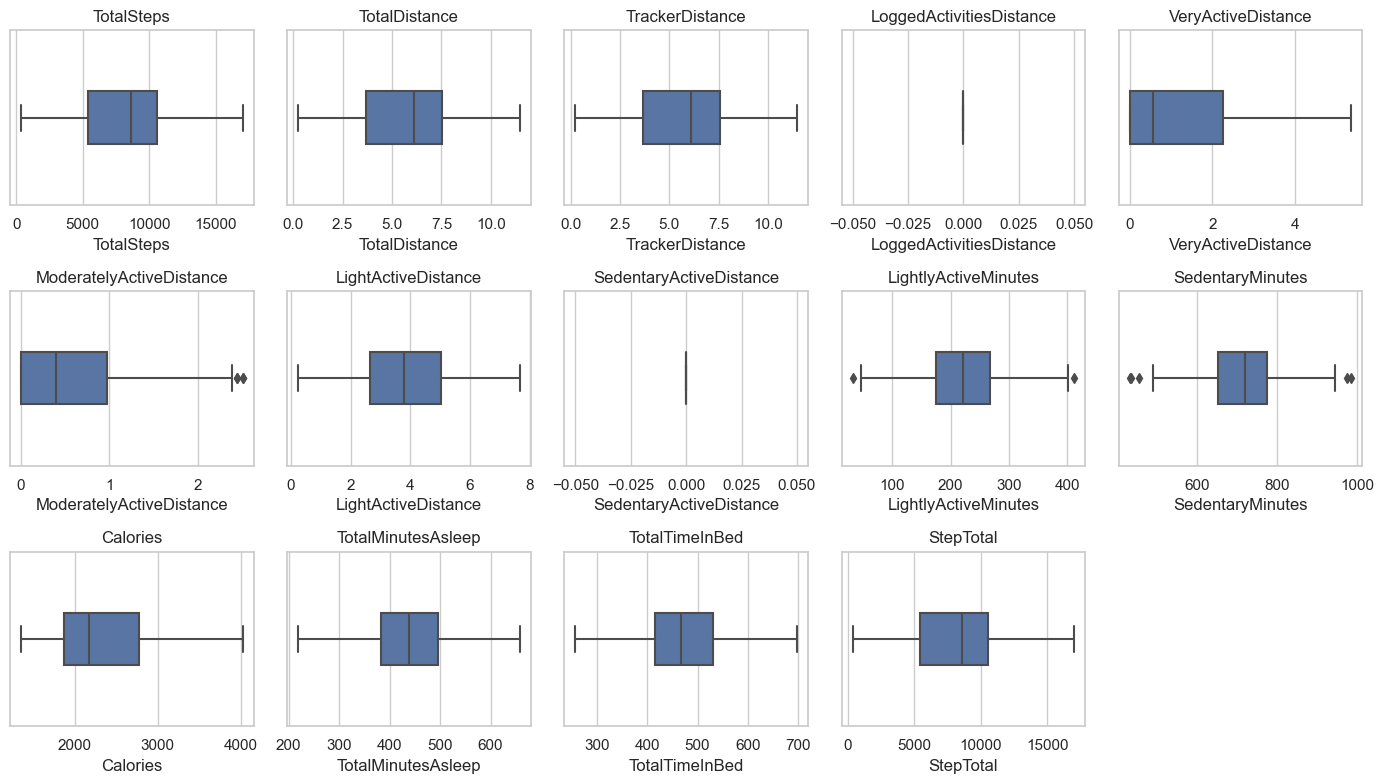

In [26]:
# Assuming your data is in a DataFrame called 'df'
columns_to_check = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
                    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
                    'SedentaryActiveDistance', 'LightlyActiveMinutes', 'SedentaryMinutes',
                    'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed', 'StepTotal']

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column], orient="vertical", width=0.3)
    plt.title(column)
    plt.tight_layout()

plt.show()


# Analyze Phase and Share Phase 
We will analyze trends of the users of FitBit and determine if that can help us on BellaBeat's marketing strategy.

**Type of users per activity level** 

since we don't have any demographic variables from our sample we want to determine the type of users with the data we have. We can classify the users by activity considering the daily amount of steps. We can categorize users as follows:

* Sedentary - Less than 5000 steps a day.
* Lightly active - Between 5000 and 7499 steps a day.
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day.
Classification has been made from the following article https://www.10000steps.org.au/articles/counting-steps/

First we will calculate the **daily steps average by user.

now our datasets looks cleaner and ready for analysis 

In [27]:

daily_average = df.groupby('Id').agg(
    mean_daily_steps=pd.NamedAgg(column='TotalSteps', aggfunc='mean'),
    mean_daily_calories=pd.NamedAgg(column='Calories', aggfunc='mean'),
    mean_daily_sleep=pd.NamedAgg(column='TotalMinutesAsleep', aggfunc='mean')
).reset_index()

# Print the first few rows
daily_average.head(30)

,Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
0,1503960366,12518.208333,1878.291667,346.125000
1,1927972279,668.000000,2186.000000,436.500000
2,2026352035,5339.826087,1547.000000,518.826087
3,2347167796,9063.615385,2089.000000,449.692308
4,3977333714,9866.066667,1511.400000,316.600000
5,4020332650,8217.666667,3540.666667,447.666667
6,4319703577,7678.565217,2115.130435,493.043478
7,4388161847,9997.842105,3019.578947,443.736842
8,4445114986,5018.440000,2231.480000,403.920000
9,4702921684,8362.636364,2999.181818,400.545455


In [28]:
# Round the mean columns to two decimal places
daily_average['mean_daily_steps'] = daily_average['mean_daily_steps'].round(2)
daily_average['mean_daily_calories'] = daily_average['mean_daily_calories'].round(2)
daily_average['mean_daily_sleep'] = daily_average['mean_daily_sleep'].round(2)

# display the DataFrame with rounded mean columns 
daily_average.head()

,Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
0,1503960366,12518.21,1878.29,346.12
1,1927972279,668.00,2186.00,436.50
2,2026352035,5339.83,1547.00,518.83
3,2347167796,9063.62,2089.00,449.69
4,3977333714,9866.07,1511.40,316.60


We will now classify our users by the daily average steps. 

In [29]:
# Create a new column 'user_type' using pandas

# Define conditions and corresponding user types
conditions = [
    (daily_average['mean_daily_steps'] < 5000),
    (daily_average['mean_daily_steps'] >= 5000) & (daily_average['mean_daily_steps'] < 7499),
    (daily_average['mean_daily_steps'] >= 7500) & (daily_average['mean_daily_steps'] < 9999),
    (daily_average['mean_daily_steps'] >= 10000)
]

user_types = ["sedentary", "lightly active", "fairly active", "very active"]

# Use numpy.select to create the 'user_type' column based on conditions
daily_average['user_type'] = pd.np.select(conditions, user_types)

dfA = daily_average
# display the DataFrame with the 'user_type' column added
dfA.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_5780\3429596683.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  daily_average['user_type'] = pd.np.select(conditions, user_types)


,Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,user_type
0,1503960366,12518.21,1878.29,346.12,very active
1,1927972279,668.00,2186.00,436.50,sedentary
2,2026352035,5339.83,1547.00,518.83,lightly active
3,2347167796,9063.62,2089.00,449.69,fairly active
4,3977333714,9866.07,1511.40,316.60,fairly active


In [30]:

# Group by 'user_type' and calculate the total count for each group
user_type_percent = dfA.groupby('user_type').size().reset_index(name='total')

# Calculate the total count of all records
user_type_percent['totals'] = user_type_percent['total'].sum()

# Calculate the percentage for each 'user_type'
user_type_percent['total_percent'] = user_type_percent['total'] / user_type_percent['totals']

# Format the 'total_percent' column as percentages
user_type_percent['total_percent'] = user_type_percent['total_percent'].apply(lambda x: f"{x:.1%}")

# Reorder 'user_type' levels
user_type_percent['user_type'] = pd.Categorical(
    user_type_percent['user_type'],
    categories=["very active", "fairly active", "lightly active", "sedentary"],
    ordered=True
)

# Print the DataFrame
user_type_percent.head()


,user_type,total,totals,total_percent
0,fairly active,9,18,50.0%
1,lightly active,4,18,22.2%
2,sedentary,3,18,16.7%
3,very active,2,18,11.1%


In [31]:
df['Dayofweek'].value_counts()

Wednesday    55
Tuesday      50
Friday       46
Thursday     44
Sunday       37
Saturday     35
Monday       33
Name: Dayofweek, dtype: int64

# visualizations and findings 


**Question 1: What are some trends in smart device usage?**

1. **Line Chart of Daily Steps Over Time:**
   - Create a line chart showing the daily total steps over time for smart device users.
   - Analyze trends in step counts, including increases or decreases in physical activity over time.
since we have about 24 disticnt users we can say that the 24 users should have a total sleep duration of 10000 x 24 = 240000 steps for each day of the week

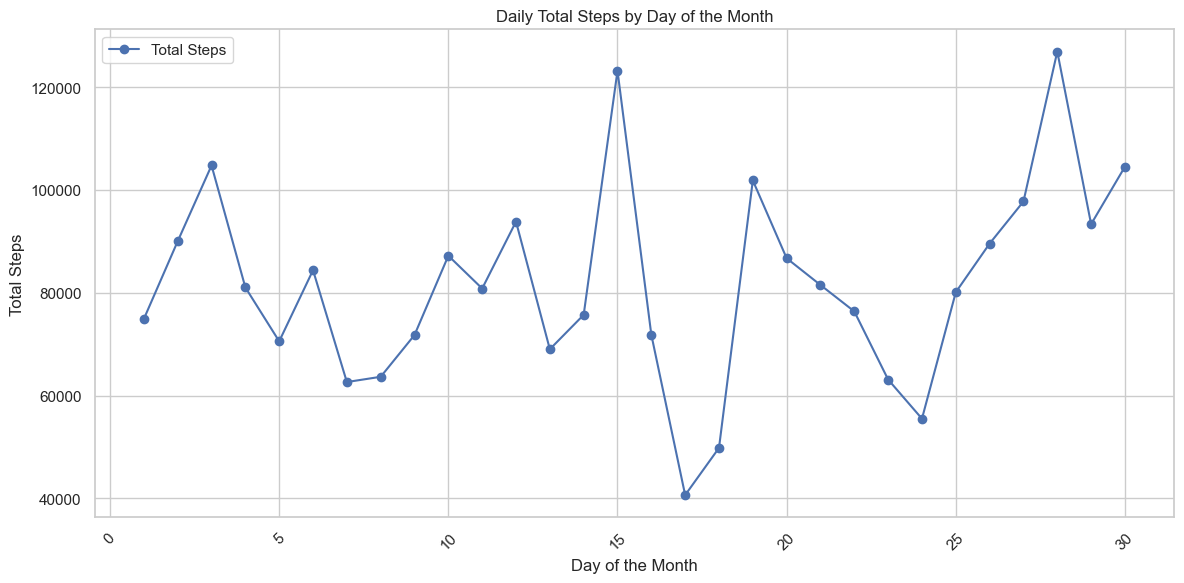

In [32]:
# Group by day_of_month and calculate the sum of TotalSteps
df_sum = df.groupby('day_of_month')['TotalSteps'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df_sum.index, df_sum.values, marker='o', linestyle='-', color='b', label='Total Steps')
plt.title('Daily Total Steps by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


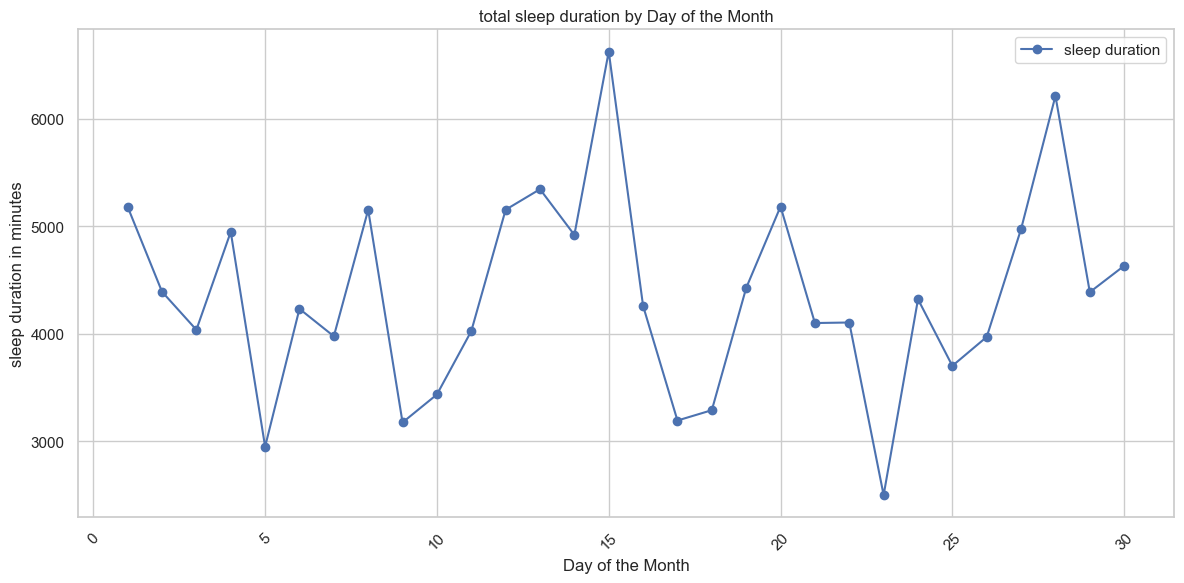

In [33]:
df_count2 = df.groupby('day_of_month')['TotalMinutesAsleep'].sum()
# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df_count2.index, df_count2.values, marker='o', linestyle='-', color='b', label='sleep duration')
plt.title('total sleep duration by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('sleep duration in minutes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


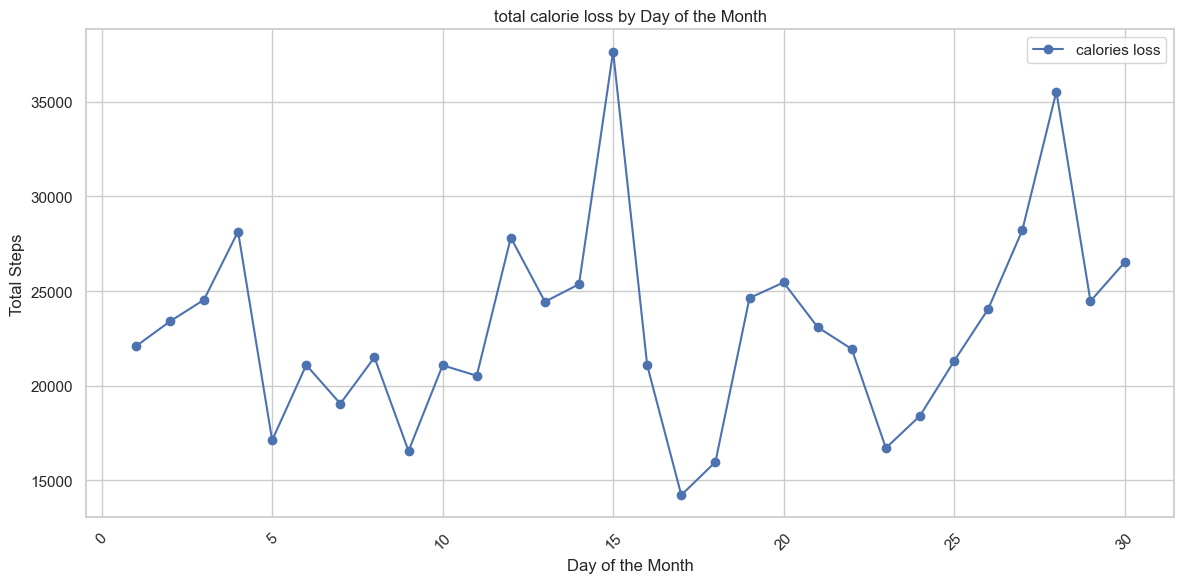

In [34]:
# Group by day_of_month and calculate the sum of TotalSteps
df_count1 = df.groupby('day_of_month')['Calories'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df_count1.index, df_count1.values, marker='o', linestyle='-', color='b', label='calories loss')
plt.title('total calorie loss by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


2. **Pie Chart of Activity Levels:**
   - Create a pie chart to show the distribution of activity levels (sedentary, lightly active, fairly active, very active) among smart device users.
   - Analyze the most prevalent activity level among users.

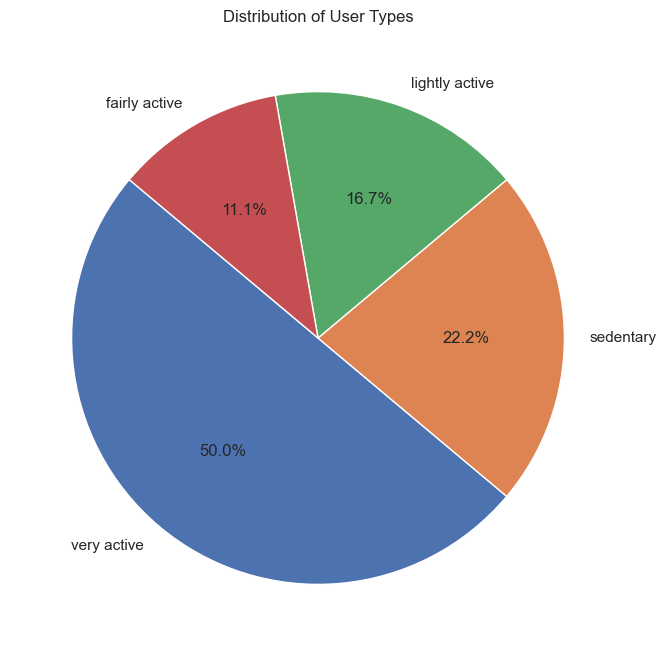

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(dfA['user_type'].value_counts(), labels=dfA['user_type'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of User Types')
plt.show()


3. **Bar Chart of Sleep Patterns, calories loss and steps :**
   - Create a bar chart showing the average daily sleep duration for smart device users.
   - Analyze trends in sleep patterns, such as changes in sleep duration over time.

Current guidelines suggest that most adults should aim for about 10,000 steps per day

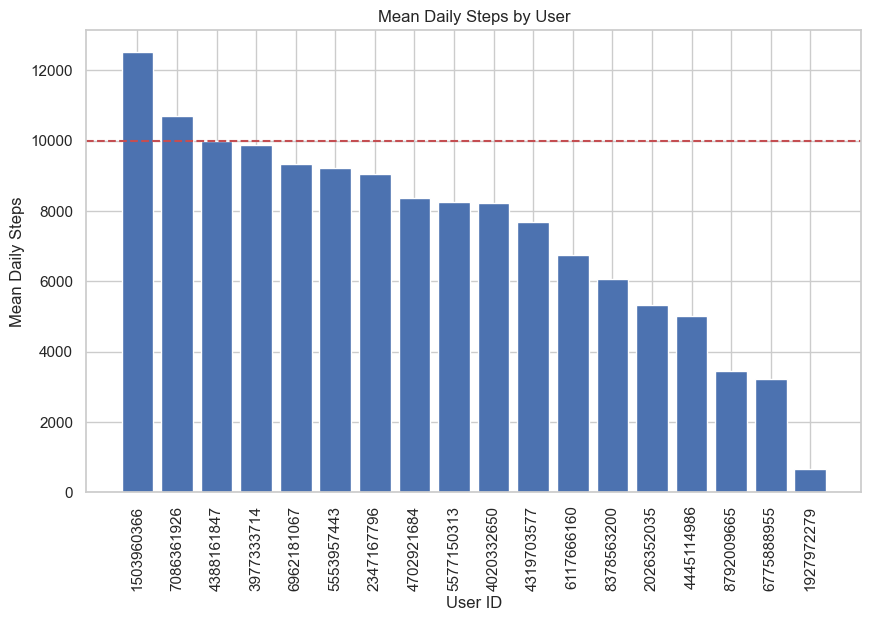

In [36]:
# Sort the data by 'mean_daily_steps' in descending order
daily_average= daily_average.sort_values(by='mean_daily_steps', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(daily_average['Id'].astype(str), daily_average['mean_daily_steps'])
plt.axhline(y=10000, color='r', linestyle='--', label='Y-Intercept')  # Add this line
plt.title('Mean Daily Steps by User')
plt.xlabel('User ID')
plt.ylabel('Mean Daily Steps')
plt.xticks(rotation=90)
plt.show()


# insight:
* From the chat above only 20.8% of the users crossed the 10,000 daily steps benchmark.
* about 70.2% users did not achieve this.
* This is indeed a poor values 

**SOLUTION**
some reasons for this could be attributed to the following:
* Users do not wear the device daily 
* Device battery does not last long enough 
* Users might be forgetful 
* users might engage in activities that might damage device e.g swimming, sports like football or might be home all day

** SUGGESTION TO BELLABEATS 
* Make variety of the devices in defferent colours
* make devices more fashion compactible 
* make more fitting devices that can be used during sports activities 
* make more devices that can be compactible for activities like swimming 

On average, women should aim to burn around 2,000 calories per day, while men should shoot for around 2,500. so wwe set calorie loss per day to 2500

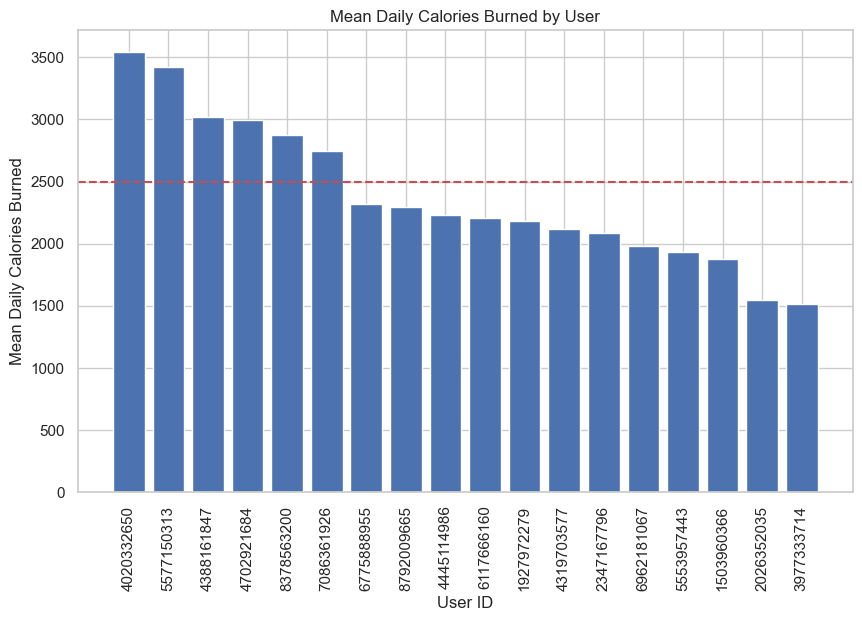

In [37]:

daily_average= daily_average.sort_values(by='mean_daily_calories', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(daily_average['Id'].astype(str), daily_average['mean_daily_calories'])
plt.axhline(y=2500, color='r', linestyle='--', label='Y-Intercept')  # Add this line
plt.title('Mean Daily Calories Burned by User')
plt.xlabel('User ID')
plt.ylabel('Mean Daily Calories Burned')
plt.xticks(rotation=90)
plt.show()


from health study trhe recommended daily sleep duration in minutes for an indidvidual is 4 - 6 cycles and one sleep circles is 90 minutes this implies that a person should sleep for about 540 minutes per day

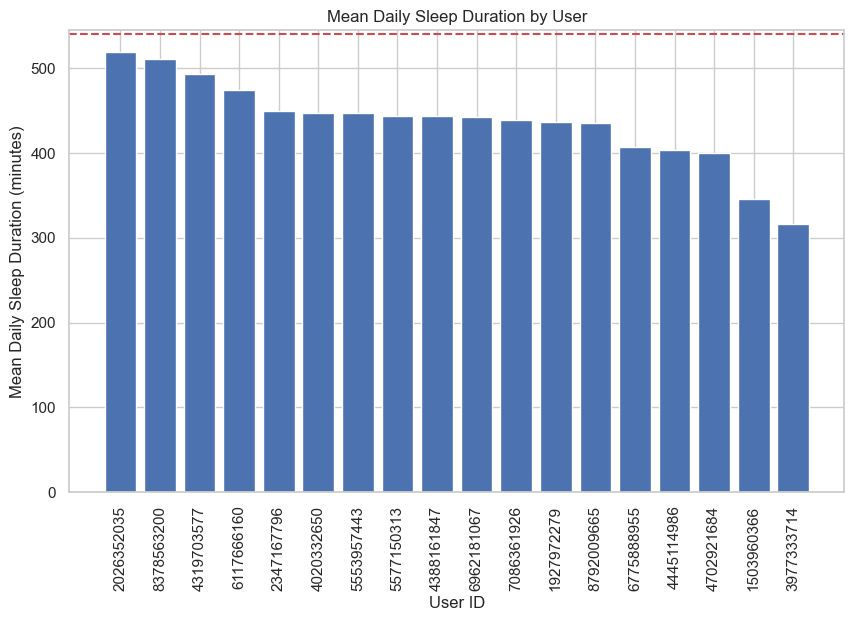

In [38]:
daily_average= daily_average.sort_values(by='mean_daily_sleep', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(daily_average['Id'].astype(str), daily_average['mean_daily_sleep'])
plt.axhline(y=540, color='r', linestyle='--', label='Y-Intercept')  # Add this line
plt.title('Mean Daily Sleep Duration by User')
plt.xlabel('User ID')
plt.ylabel('Mean Daily Sleep Duration (minutes)')
plt.xticks(rotation=90)
plt.show()


# insight:
From the chat above only 1 user met and crossed the required daily sleeping time of 540 minutes benchmark.
the other 23 users did not achieve this.
This is indeed a poor values

SOLUTION 
some reasons for this could be attributed to the following:

Users do not wear the device while sleeeping
Device battery does not last long enough
Users might be forgetful

** SUGGESTION TO BELLABEATS

Bellabeats should consider making more portable and light devices 
make devices more sleep compactible 

**Question 2: How could these trends apply to Bellabeat customers?**


1. **Comparison of Bellabeat Users vs. Smart Device Users:**
   - Create a bar chart comparing the activity levels (sedentary, lightly active, fairly active, very active) of Bellabeat users with those of smart device users.
   - Analyze whether Bellabeat users have healthier activity levels compared to the broader population.

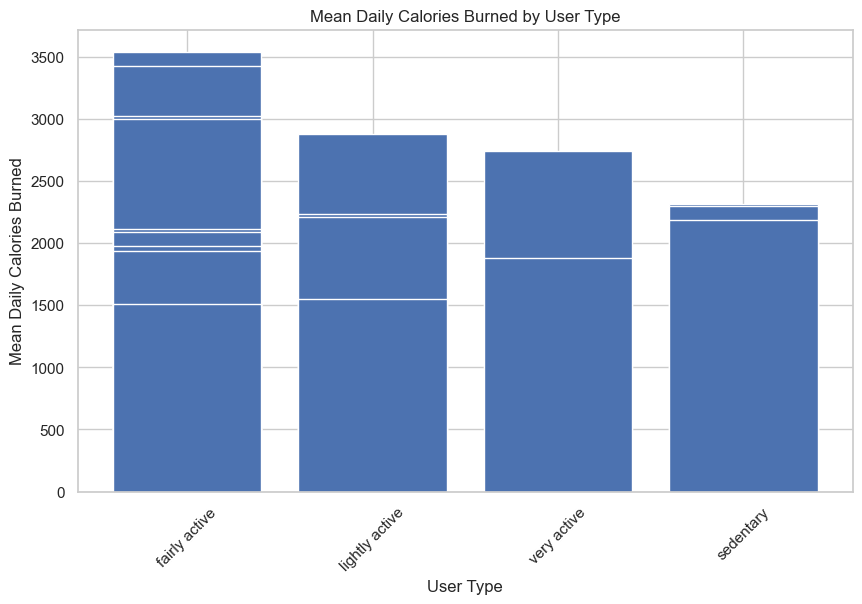

In [39]:
dfA= dfA.sort_values(by='mean_daily_calories', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(dfA['user_type'], dfA['mean_daily_calories'])
plt.title('Mean Daily Calories Burned by User Type')
plt.xlabel('User Type')
plt.ylabel('Mean Daily Calories Burned')
plt.xticks(rotation=45)
plt.show()


fairly active members tends to loose more calories than other members 
lightly active users are seond highest in this categories and sedendary members are lowest in this category

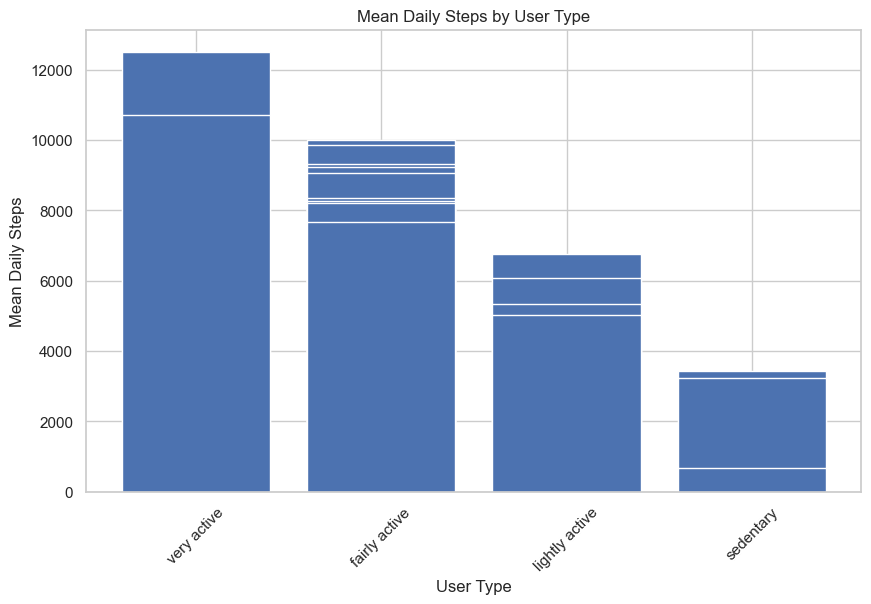

In [40]:
dfA= dfA.sort_values(by='mean_daily_steps', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(dfA['user_type'], dfA['mean_daily_steps'])
plt.title('Mean Daily Steps by User Type')
plt.xlabel('User Type')
plt.ylabel('Mean Daily Steps')
plt.xticks(rotation=45)
plt.show()


very active members walk for longer time and distance followed by fairly active members, sedentary users does not make much daily steps 

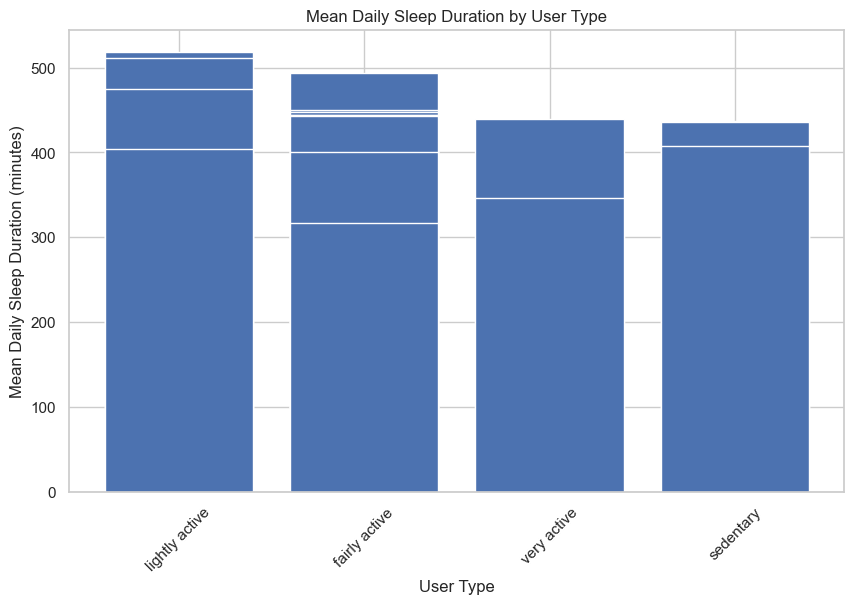

In [41]:
dfA= dfA.sort_values(by='mean_daily_sleep', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(dfA['user_type'], dfA['mean_daily_sleep'])
plt.title('Mean Daily Sleep Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Mean Daily Sleep Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


lightly active members tends to have more sleep than other users,
fairly active memebers are the next highest in the sleeping rank while sedatary members get less sleep time 

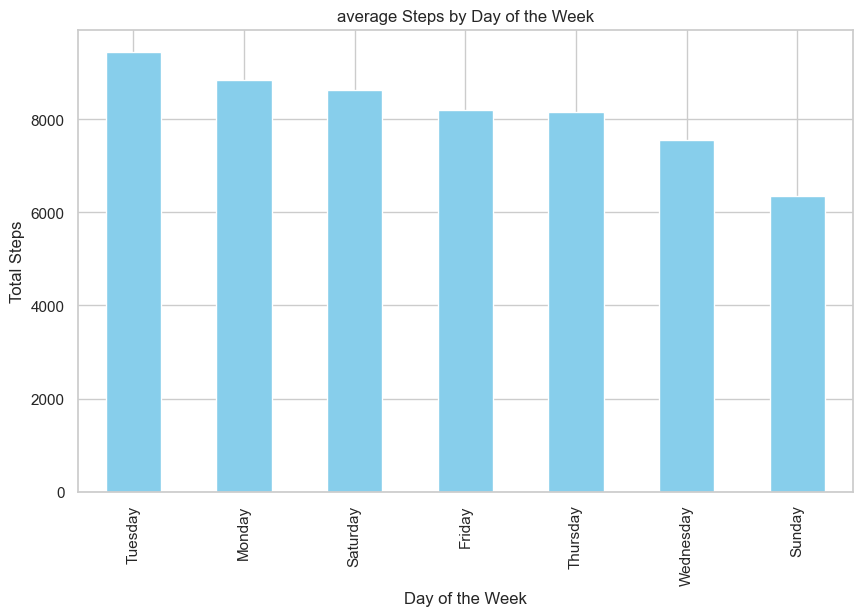

In [42]:
# Group by 'DayOfWeek' and calculate the sum of 'TotalSteps' for each day
steps_by_day = df.groupby('Dayofweek')['TotalSteps'].mean()
# Sort the data in descending order
steps_by_day = steps_by_day.sort_values(ascending=False)

# Create a bar plot
steps_by_day.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('average Steps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Show the plot
plt.show()


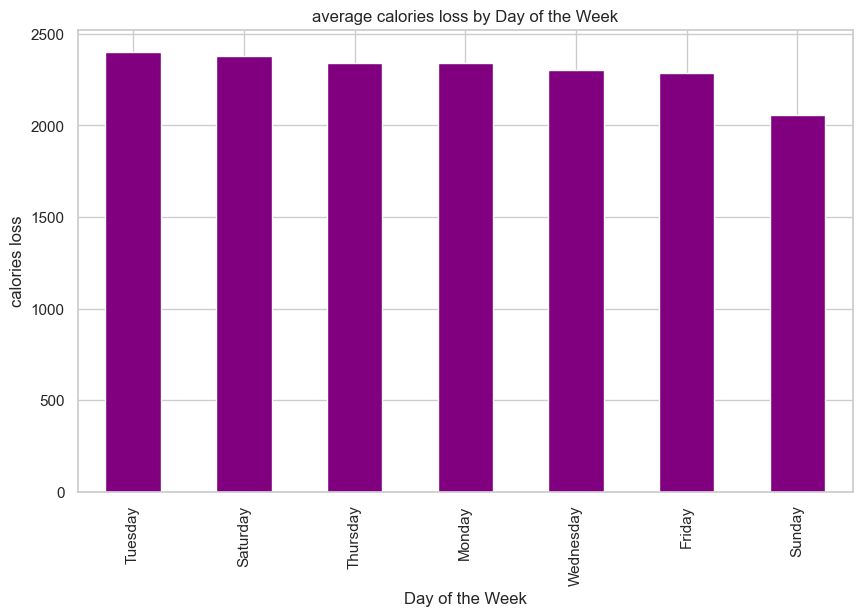

In [43]:
plotb = df.groupby('Dayofweek')['Calories'].mean()
plotb=plotb.sort_values(ascending=False)
plotb.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('average calories loss by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('calories loss')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Show the plot
plt.show()

users loose more calories on the Tuesdays and Saturdays. 
users loose  the least calories on sundays 

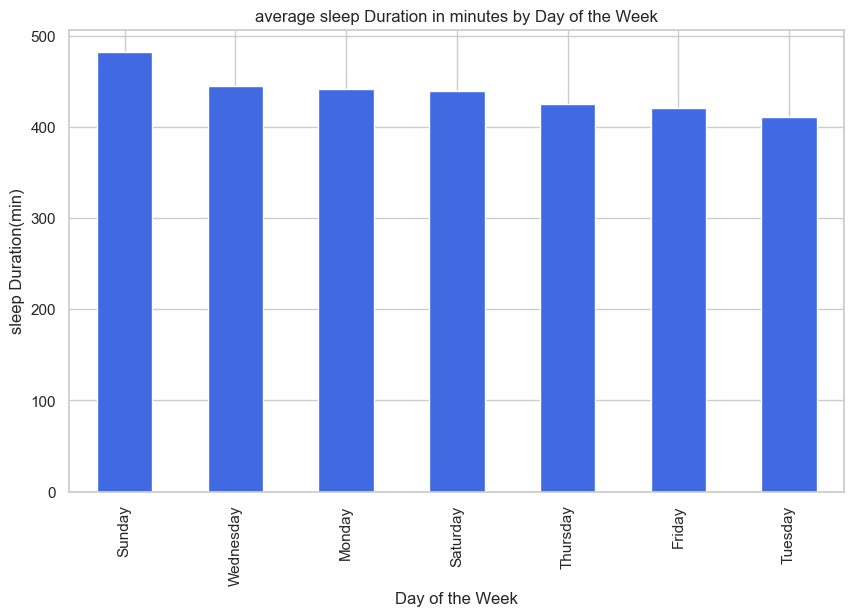

In [44]:
plotb = df.groupby('Dayofweek')['TotalMinutesAsleep'].mean()
plotb=plotb.sort_values(ascending=False)
plotb.plot(kind='bar', figsize=(10, 6), color='royalblue')
plt.title('average sleep Duration in minutes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('sleep Duration(min)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Show the plot
plt.show()

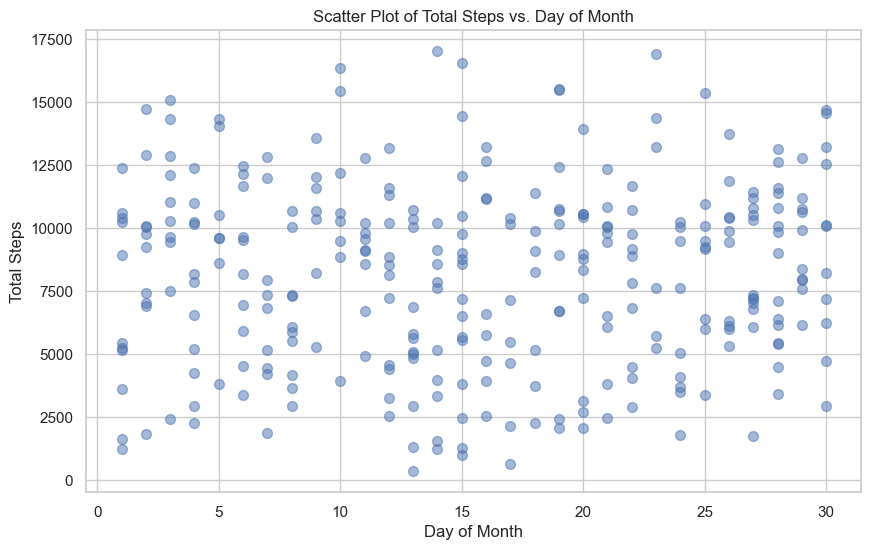

In [45]:
# Assuming your data is in a DataFrame called 'df'
plt.figure(figsize=(10, 6))
plt.scatter(df['day_of_month'], df['TotalSteps'], marker='o', s=50, alpha=0.5)
plt.title('Scatter Plot of Total Steps vs. Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Total Steps')
plt.grid(True)
plt.show()


no corrilation between columns 

# conclusions 



Bellabeat's mission is to empower women by providing them with the data to discover themselves.

In order for us to respond to our business task and help Bellabeat on their mission, based on our results, I would advice to use own tracking data for further analysis. 
Datasets used have a small sample and can be biased since we didn't have any demographic details of users. Knowing that our main target are young and adult women I would encourage to continue finding trends to be able to create a marketing stragety focused on them. 

That being said, after our analysis we have found different trends that may help our online campaign and improve **Bellabeat app**: 

|Recommendation| Description |
|---| ---|
|1. Daily notification on steps and posts on app| We classified users into 4 categories and saw that the average of users walk more than 7,500 steps daily besides Sundays. We can encourage customers to reach at least daily recommended steps by CDC - 8.000 **sending them alarms if they haven't reached the steps and creating also posts on our app explaining the benefits of reaching that goal**. As CDC explains the more steps you walk the lower is the mortality rate. We also saw a positive correlation between steps and calories.|
|2. Notification and sleep techniques| Based on our results we can see that users sleep less than 8 hours a day. **They could set up a desired time to go to sleep and receive a notification minutes before to prepare to sleep**. Also offer helpfull resources to help customers sleep - ex. breathing advises, podcasts with relaxing music, sleep techniques.|


On our analysis we didn't just check trends on daily users habits we also realized that just 50% of the users use their device on a daily basis and that just 36% of the users wear the device all time the day they used it. We can continue promote Bellabeat's products features: 

* Water-resistant  
* Long-lasting batteries 
* Fashion/ elegant products 

You can wear the products everyday to any occasion without worrying about the battery. 
